<a href="https://colab.research.google.com/github/yasheelaanjali/Ai/blob/main/2_2c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

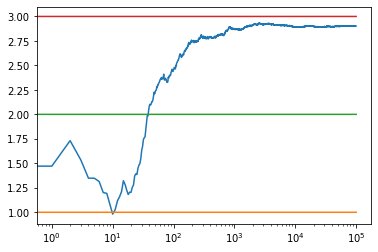

1.0019960178004286
2.0243587966992775
3.0018809953847456


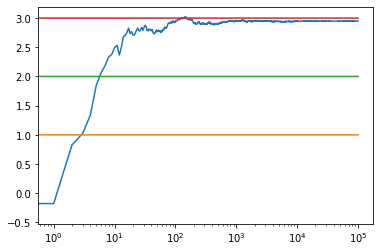

0.9938595298366772
1.9634490647536003
2.999414757750453


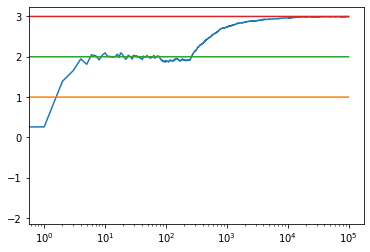

1.0984677186618603
1.942760069521838
3.0068130612789545


In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Define Action class
class Act:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
    def choose(self):
        return np.random.randn() + self.m
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x


def run_experimental(m1, m2, m3, eps, N):
    acts = [Act(m1), Act(m2), Act(m3)]

    data = np.empty(N)
    for i in range(N):
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([a.mean for a in acts])
        x = acts[j].choose()
        acts[j].update(x)
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for a in acts:
        print(a.mean)
    return cumulative_average


if __name__ == '__main__':
    c_1 = run_experimental(1.0, 2.0, 3.0, 0.1, 100000)
    c_05 = run_experimental(1.0, 2.0, 3.0, 0.05, 100000)
    c_01 = run_experimental(1.0, 2.0, 3.0, 0.01, 100000)

